In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

pd.set_option('display.max_columns', 100)

In [2]:
# Getting song info with Artist name, Album name
song_info = pd.read_csv('../input/19000-spotify-songs/song_info.csv')

In [3]:
song_info

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems
...,...,...,...,...
18830,Let It Breathe,Water Liars,Water Liars,Your Favorite Coffeehouse
18831,Answers,Brooke Annibale,The Simple Fear,Your Favorite Coffeehouse
18832,Sudden Love (Acoustic),The Woodlands,"Parallels, Vol. II",Your Favorite Coffeehouse
18833,Gentle on My Mind,Robert Ellis,Dear John,Your Favorite Coffeehouse


In [4]:
# Getting song data
song_data = pd.read_csv('../input/19000-spotify-songs/song_data.csv')

In [5]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [7]:
# Showing the fact that there are duplicates
song_data[song_data["song_name"]=="Boulevard of Broken Dreams"]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
10689,Boulevard of Broken Dreams,71,261266,0.00394,0.490,0.679,0.000015,8,0.0383,-3.680,1,0.0309,167.046,4,0.506


In [8]:
# Droping duplicates in data and info
song_data.drop_duplicates(subset="song_name", keep="first", inplace=True)
song_info.drop_duplicates(subset="song_name", keep="first", inplace=True)

In [9]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         13070 non-null  object 
 1   song_popularity   13070 non-null  int64  
 2   song_duration_ms  13070 non-null  int64  
 3   acousticness      13070 non-null  float64
 4   danceability      13070 non-null  float64
 5   energy            13070 non-null  float64
 6   instrumentalness  13070 non-null  float64
 7   key               13070 non-null  int64  
 8   liveness          13070 non-null  float64
 9   loudness          13070 non-null  float64
 10  audio_mode        13070 non-null  int64  
 11  speechiness       13070 non-null  float64
 12  tempo             13070 non-null  float64
 13  time_signature    13070 non-null  int64  
 14  audio_valence     13070 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
# Joining song info and song data
data = song_data.merge(song_info, on='song_name', how='left')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         13070 non-null  object 
 1   song_popularity   13070 non-null  int64  
 2   song_duration_ms  13070 non-null  int64  
 3   acousticness      13070 non-null  float64
 4   danceability      13070 non-null  float64
 5   energy            13070 non-null  float64
 6   instrumentalness  13070 non-null  float64
 7   key               13070 non-null  int64  
 8   liveness          13070 non-null  float64
 9   loudness          13070 non-null  float64
 10  audio_mode        13070 non-null  int64  
 11  speechiness       13070 non-null  float64
 12  tempo             13070 non-null  float64
 13  time_signature    13070 non-null  int64  
 14  audio_valence     13070 non-null  float64
 15  artist_name       13070 non-null  object 
 16  album_names       13070 non-null  object

In [12]:
data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,13070.000000,1.307000e+04,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000,13070.000000
mean,48.487682,2.186274e+05,0.277770,0.625010,0.635722,0.096672,5.319510,0.180517,-7.790448,0.632976,0.100839,121.151915,3.951568,0.528564
std,20.108158,6.345056e+04,0.301784,0.159125,0.223985,0.246570,3.583933,0.145377,4.110762,0.482011,0.105197,29.105418,0.319291,0.248652
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.011900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.829672e+05,0.025000,0.524250,0.490000,0.000000,2.000000,0.093300,-9.537250,0.000000,0.037300,98.069500,4.000000,0.334000
50%,51.000000,2.114860e+05,0.147000,0.637000,0.667000,0.000022,5.000000,0.121000,-6.859500,1.000000,0.054400,120.025000,4.000000,0.529000
75%,63.000000,2.445060e+05,0.479750,0.741000,0.815000,0.005910,8.000000,0.223000,-5.041250,1.000000,0.115000,139.955750,4.000000,0.730000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [13]:
data_gb_artist = data.groupby(['artist_name']).size().reset_index().sort_values([0], ascending=False)
data_gb_artist.columns = ['artist_name', 'count']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lady Gaga'),
  Text(1, 0, 'Kanye West'),
  Text(2, 0, 'Drake'),
  Text(3, 0, 'Eminem'),
  Text(4, 0, 'Gucci Mane'),
  Text(5, 0, 'The Beatles'),
  Text(6, 0, 'Celia Cruz'),
  Text(7, 0, 'The Weeknd'),
  Text(8, 0, 'Martin Garrix'),
  Text(9, 0, 'Hank Williams')])

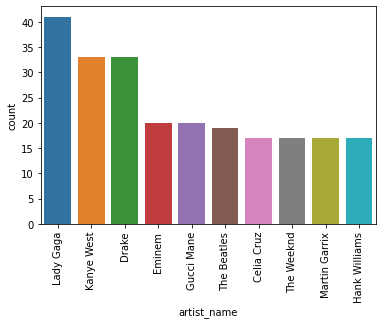

In [14]:
sns.barplot(x="artist_name", y="count", data=data_gb_artist.head(10))
plt.xticks(rotation=90)